# Analyze Received Long Multi Tone Calibration WAV File
## By Terry Bondy, VA3TYB

In [1]:
printf(strftime ("Last updated: %A %e %B %Y %Z", localtime (time())))
%plot --format svg
format free
pkg load signal

Last updated: Saturday 11 January 2020 UTC

In [2]:
inputFilename = "/mnt/lexar/SDRuno_20200107_005334Z_445900kHz_trimmed.wav"

inputFilename = /mnt/lexar/SDRuno_20200107_005334Z_445900kHz_trimmed.wav


In [3]:
audioinfo(inputFilename)

ans =

  scalar structure containing the fields:

    Filename = /mnt/lexar/SDRuno_20200107_005334Z_445900kHz_trimmed.wav
    CompressionMethod = 
    NumChannels = 2
    SampleRate = 62500
    TotalSamples = 1.40625e+07
    Duration = 225
    BitsPerSample = -1
    BitRate = -1
    Title = 
    Artist = 
    Comment = 



In [4]:
[y, fs] = audioread(inputFilename);
size(y)
fs

ans =

 1.40625e+07 2


fs = 62500


In [5]:
z=y(:,1)+i*y(:,2);

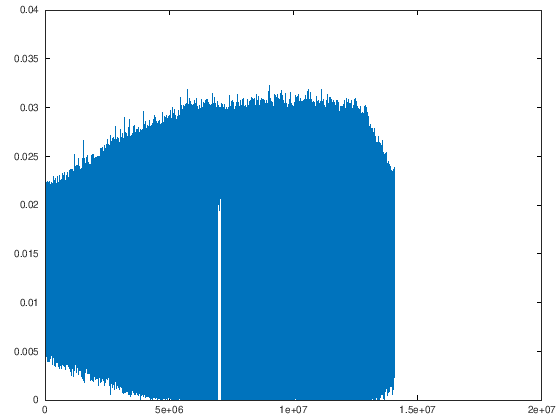

In [6]:
plot(abs(z));

In [7]:
size(z)

ans =

 1.40625e+07 1




In [8]:
sampleRate = fs;
numPeriods = rows(z)/sampleRate;
period = numPeriods;
Tshort = 0:1/sampleRate:1;
T = 0:1/sampleRate:period;

In [9]:
RC = (1 - cos(2*pi*Tshort))/2;

In [10]:
Sig = z(1:columns(RC))' .* RC;

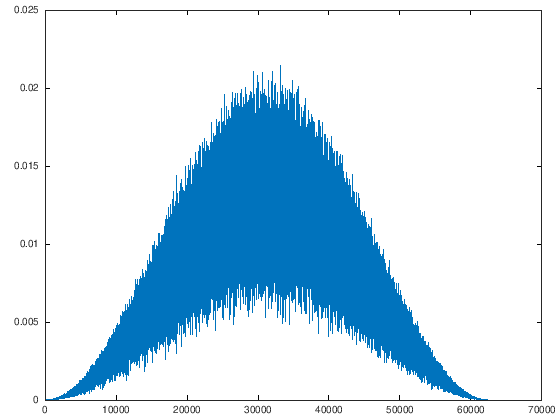

In [11]:
plot(abs(Sig));

In [12]:
E_cos_pulse = abs(fft(Sig, sampleRate*10 + 1));
F_base = linspace(-sampleRate/2, sampleRate/2, columns(E_cos_pulse));

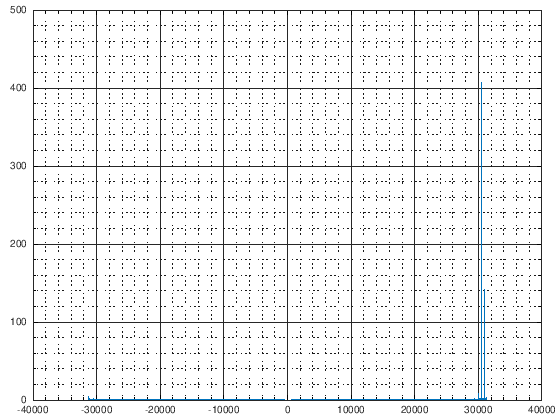

In [13]:
plot(F_base, E_cos_pulse)
grid on
grid minor
# axis([-760 -750], "tic")

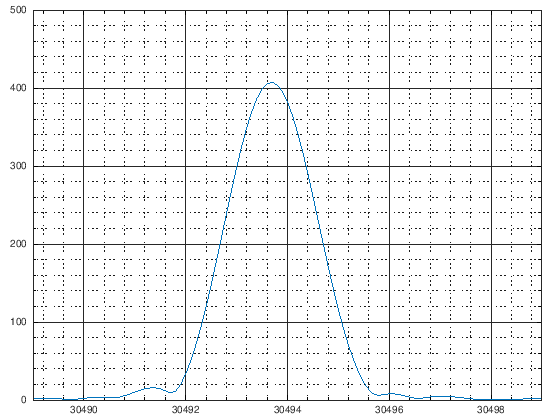

In [14]:
plot(F_base, E_cos_pulse)
grid on
grid minor
axis([30494-5 30494+5], "tic")

In [15]:
F_base(find(E_cos_pulse(:) == max(E_cos_pulse)))

ans = 30493.7


In [16]:
find(E_cos_pulse(:) == max(E_cos_pulse))

ans = 617438


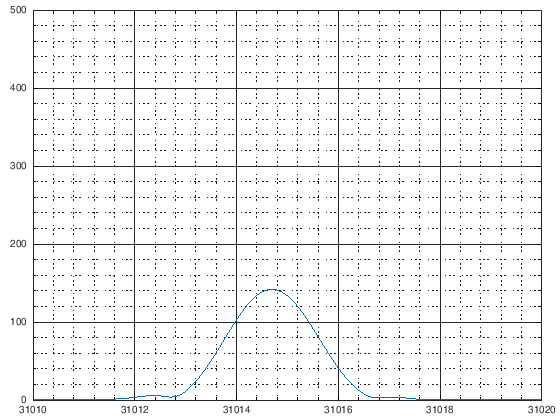

In [17]:
plot(F_base, E_cos_pulse)
grid on
grid minor
axis([31015-5 31015+5], "tic")

In [18]:
find(F_base(:) == 30498)

ans = 617481


In [19]:
find(F_base(:) == 28724)

ans = 599741


In [20]:
F_base(find(E_cos_pulse(:) == max(E_cos_pulse(617481:end))))

ans = 31014.7


In [21]:
F_base(find(E_cos_pulse(:) == max(E_cos_pulse(617481:end)))) - ...
F_base(find(E_cos_pulse(:) == max(E_cos_pulse)))

ans = 521


In [22]:
721 - 521

ans = 200


In [23]:
fracSeconds = 1;
indexIncr = (columns(Tshort)-1)/fracSeconds;
Freqs = [];
for startIndex = 1:indexIncr:rows(z)-columns(RC)-1
  SigLoop = z(startIndex:startIndex+columns(RC)-1)' .* RC;
  E_cos_pulse_loop = abs(fft(SigLoop, sampleRate*10 + 1));
  F_base_loop = linspace(-sampleRate/2, sampleRate/2, columns(E_cos_pulse_loop));
  freq = F_base(find(E_cos_pulse_loop(:) == max(E_cos_pulse_loop)))
  [Peaks idxPeaks] = findpeaks(E_cos_pulse_loop(:)', "MinPeakHeight", 50);
  # Peaks
  F_base_loop(idxPeaks)
  time = T(startIndex)
endfor

freq = 30493.7
ans =

 30493.7 31014.7


time = 0
freq = 30494.1
ans =

 30494.1 31015.1


time = 1
freq = 30494.5
ans =

 30494.5 31015.4


time = 2
freq = 30494.9
ans =

 30494.9 31008.9


time = 3
freq = 30495.4
ans =

 30495.4 31009.4


time = 4
freq = 30495.8
ans =

 30495.8 31009.8


time = 5
freq = 30496.2
ans =

 30496.2 31003.3


time = 6
freq = 30496.6
ans =

 30496.6 31003.7


time = 7
freq = 30497.1
ans =

 30497.1 31004


time = 8
freq = 30497.5
ans =

 30497.5 30996.5


time = 9
freq = 30498
ans =

 30498 30997


time = 10
freq = 30498.3
ans =

 30498.3 30997.3


time = 11
freq = 30498.9
ans =

 30498.9 30989.9


time = 12
freq = 30499.3
ans =

 30499.3 30990.3


time = 13
freq = 30499.7
ans =

 30499.7 30990.7


time = 14
freq = 30500.1
ans =

 30500.1 30983.1


time = 15
freq = 30500.5
ans =

 30500.5 30983.6


time = 16
freq = 30501
ans =

 30501 30984


time = 17
freq = 30501.5
ans =

 30501.5 30976.5


time = 18
freq = 30501.9
ans =

 30501.9 30977


time = 19
freq =